In [25]:
import sys
sys.path.append('../src/')

import os
import feature_postprep

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
lrr = pd.read_csv('./../../data/clinical_experiment/data_to_analysis/target_lrc.csv', index_col=0)
dfs = pd.read_csv('./../../data/clinical_experiment/data_to_analysis/target_pfs.csv', index_col=0)

In [13]:
data = pd.read_csv('./../../data/clinical_experiment/data_to_analysis/clinical_vars.csv', index_col=0)
data.head()

,age,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,icd10_C09,...,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7,stage_1,stage_2,stage_3,stage_4
ID,,,,,,,,,,,,,,,,,,,,,
2,60.832877,0.000000,39.0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,49.906849,4.786027,33.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,54.238356,0.000000,42.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,54.687671,18.343836,0.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
10,61.728767,0.000000,35.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
data.shape

(198, 46)

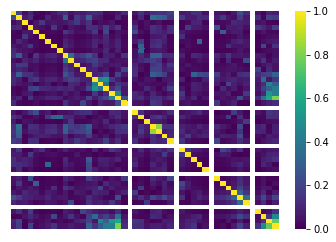

In [17]:
# Create correlation matrix
corr_matrix = data.corr().abs()
plt.figure()
axis = sns.heatmap(
    corr_matrix, cmap=plt.cm.viridis, xticklabels='', yticklabels=''
);

In [18]:
corr_matrix.head()

,age,year_smoking,days_naxogin,sex_M,icd10_C02,icd10_C03,icd10_C04,icd10_C05,icd10_C06,icd10_C09,...,cisplatin_2,cisplatin_3,cisplatin_4,cisplatin_5,cisplatin_6,cisplatin_7,stage_1,stage_2,stage_3,stage_4
age,1.000000,0.200416,0.033103,0.106238,0.026362,0.011370,0.031323,0.064465,0.117894,0.137278,...,0.047337,0.018967,0.066575,0.235476,0.115163,NaN,0.056901,0.012334,0.097391,0.081070
year_smoking,0.200416,1.000000,0.080232,0.123673,0.005603,0.015440,0.106814,0.043422,0.061071,0.286888,...,0.163888,0.063910,0.037340,0.174552,0.066469,NaN,0.134665,0.015278,0.196166,0.178970
days_naxogin,0.033103,0.080232,1.000000,0.007433,0.059586,0.160102,0.052885,0.065125,0.049006,0.065680,...,0.028385,0.036912,0.110371,0.095565,0.076081,NaN,0.040657,0.062571,0.014534,0.008305
sex_M,0.106238,0.123673,0.007433,1.000000,0.060230,0.041412,0.023070,0.164418,0.041412,0.007524,...,0.019459,0.078287,0.073395,0.087487,0.043505,NaN,0.173793,0.112327,0.062887,0.180483
icd10_C02,0.026362,0.005603,0.059586,0.060230,1.000000,0.014620,0.025451,0.029464,0.014620,0.158516,...,0.293944,0.047325,0.080971,0.068378,0.012457,NaN,0.020728,0.062886,0.027361,0.021526


In [24]:
# Find index of feature columns with correlation greater than thresh
THRESH = 0.85

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > THRESH)]
to_drop

[]

## PCA

In [26]:
# Standardize prior to PCA.
scaler = StandardScaler()
X_std = scaler.fit_transform(data.values)

pca_model = PCA(n_components=data.shape[1])
pca_model.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=46, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

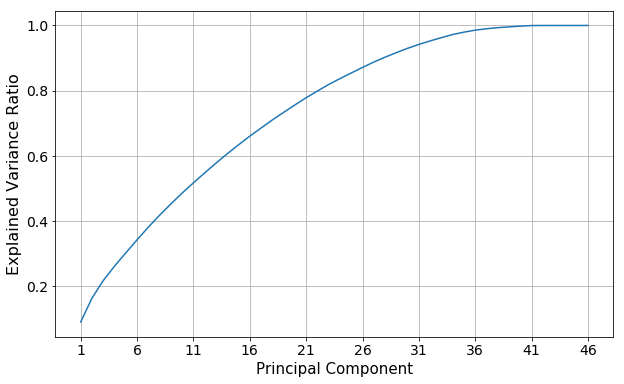

In [29]:
# Information (variance) attributed to each PC
plt.figure(figsize=(10, 6))
plt.plot(
    np.arange(1, data.shape[1] + 1), 
    np.cumsum(pca_model.explained_variance_ratio_)
);
plt.xlabel('Principal Component', fontsize=15);
plt.ylabel('Explained Variance Ratio', fontsize=16);
plt.xticks(np.arange(1, data.shape[1] + 1, 5), np.arange(1, data.shape[1] + 1, 5))
plt.yticks(fontsize=14); plt.xticks(fontsize=14);
plt.grid()